In [24]:

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.DataFrame(pd.read_csv('Hiring_details_with_status_LOB.csv',index_col = 0))

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Offered band'].fillna('E1',inplace=True)

In [38]:
df.head()


,Sno,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,Location,Age,LOB_id,Status,LOB,Unnamed: 20
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,Noida,34.0,1,Joined,ERS,NaN
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,Chennai,34.0,2,Joined,INFRA,NaN
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,Noida,27.0,2,Joined,INFRA,NaN
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,Noida,34.0,2,Joined,INFRA,NaN
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,Noida,34.0,2,Joined,INFRA,NaN


# Hypothesis for Duration to accept offer

In [64]:
JD = df[df.Status=='Joined']['Duration to accept offer']
NJD = df[df.Status=='Not Joined']['Duration to accept offer']

In [65]:
print(st.shapiro(NJD), st.shapiro(JD))
### pvalue < 0.05---> reject H0 --> the data does not follow normal distribution

ShapiroResult(statistic=0.7682324647903442, pvalue=1.3312335411085762e-43) ShapiroResult(statistic=0.8031497001647949, pvalue=0.0)


In [37]:
df.groupby('Status')['Duration to accept offer'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Joined,7313.0,20.624368,24.435283,0.0,2.0,10.0,32.0,143.0
Not Joined,1682.0,24.956599,30.857484,0.0,4.0,10.0,37.0,224.0


<AxesSubplot:xlabel='Status', ylabel='Duration to accept offer'>

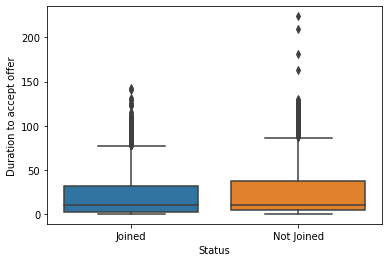

In [39]:
sn.boxplot(x=df.Status, y=df['Duration to accept offer'])

In [40]:
JC=df[df.Status=='Joined']['Duration to accept offer']
NJC= df[df.Status=='Not Joined']['Duration to accept offer']

In [41]:
## test of variance equality ( levene test)
## H0: pop variances are same; H1: Pop variances are different
st.levene(JC,NJC)

LeveneResult(statistic=32.56020341340111, pvalue=1.1921738123609167e-08)

In [42]:
##pvalue< alpha(0.05 )---> reject H0 hence we conclude variance are different

In [43]:
## test of Association - Chi square test 
## test the claim that is there any association b/w Status and the Duration to accept offer letter
## H0: there is no association b/w Status and the Duration to accept
## H1: There is an association b/w Status and the Duration to accept

In [44]:
table = pd.crosstab(df.Status, df['Duration to accept offer'])
table

Duration to accept offer,0,1,2,3,4,5,6,7,8,9,...,127,129,130,131,140,143,163,181,210,224
Status,,,,,,,,,,,,,,,,,,,,,
Joined,686,730,473,440,353,302,257,198,114,101,...,0,2,0,1,1,1,0,0,0,0
Not Joined,71,113,132,78,122,78,77,67,52,26,...,2,1,1,0,0,0,1,1,1,1


In [68]:
st.chi2_contingency(table)

(416.3466859886763,
 1.9247037686010985e-30,
 135,
 array([[6.15446470e+02, 6.85365092e+02, 4.91869372e+02, 4.21137743e+02,
         3.86178432e+02, 3.08942746e+02, 2.71544414e+02, 2.15446915e+02,
         1.34959200e+02, 1.03251918e+02, 1.23577098e+02, 1.17073041e+02,
         1.06503947e+02, 9.75608671e+01, 8.86177877e+01, 7.23576431e+01,
         8.61787660e+01, 8.37397443e+01, 8.29267371e+01, 6.42275709e+01,
         9.83738744e+01, 7.96747082e+01, 5.69105058e+01, 5.69105058e+01,
         7.31706504e+01, 5.69105058e+01, 6.66665926e+01, 7.07316287e+01,
         8.53657588e+01, 5.85365203e+01, 5.52844914e+01, 8.53657588e+01,
         6.82926070e+01, 5.69105058e+01, 7.23576431e+01, 6.66665926e+01,
         3.73983324e+01, 5.28454697e+01, 4.95934408e+01, 5.60974986e+01,
         4.71544191e+01, 5.12194553e+01, 5.28454697e+01, 4.22763758e+01,
         3.49593107e+01, 2.52032240e+01, 3.82113396e+01, 2.35772096e+01,
         2.68292385e+01, 3.49593107e+01, 3.17072818e+01, 2.43902168e+01,


In [66]:
## pvalue<alpha ---> rejects null hypothesis hence 
## there is a relation between Duration of acceptance and Status

# Hypothesis for location

In [67]:
table1 = pd.crosstab(df.Status, df.Location)
table1

Location,Ahmedabad,Bangalore,Chennai,Cochin,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
Status,,,,,,,,,,,
Joined,5,1742,2486,7,118,266,100,176,2362,13,38
Not Joined,1,488,664,1,28,75,29,21,365,0,10


In [70]:
st.chi2_contingency(table1)

(92.67231058612991,
 1.5784067706590078e-15,
 10,
 array([[4.87804336e+00, 1.81300611e+03, 2.56097276e+03, 6.50405781e+00,
         1.18699055e+02, 2.77235464e+02, 1.04877932e+02, 1.60162424e+02,
         2.21707071e+03, 1.05690939e+01, 3.90243469e+01],
        [1.12195664e+00, 4.16993885e+02, 5.89027237e+02, 1.49594219e+00,
         2.73009450e+01, 6.37645359e+01, 2.41220678e+01, 3.68375764e+01,
         5.09929294e+02, 2.43090606e+00, 8.97565314e+00]]))

## there is association between location and Status

# Hypothesis for Joining Bonus

In [72]:
table2 = pd.crosstab(df.Status, df['Joining Bonus'])
table2

Joining Bonus,No,Yes
Status,,
Joined,6977,336
Not Joined,1601,81


In [73]:
st.chi2_contingency(table2)

(0.10537634560284669,
 0.7454707857023846,
 1,
 array([[6973.97598666,  339.02401334],
        [1604.02401334,   77.97598666]]))

## there is association between joining bonus and status

# Hypothesis for Gender

In [75]:
table3 = pd.crosstab(df.Status, df['Gender'])
table3

Gender,Female,Male
Status,,
Joined,1278,6035
Not Joined,273,1409


In [77]:
st.chi2_contingency(table3)

(1.399549766122848,
 0.23679896899569233,
 1,
 array([[1260.97420789, 6052.02579211],
        [ 290.02579211, 1391.97420789]]))

there is NO association between Gender and status|

# Hypothesis for LOB

In [80]:
table4 = pd.crosstab(df.Status, df['LOB'])
table4

LOB,AXON,BFSI,CSMP,EAS,ERS,ETS,Healthcare,INFRA,MMS
Status,,,,,,,,,
Joined,440,1059,472,254,1895,574,102,2502,15
Not Joined,128,337,107,92,531,117,22,348,0


In [81]:
st.chi2_contingency(table4)

(146.97097267814743,
 8.393814703388281e-28,
 8,
 array([[ 461.7881045 , 1134.95808783,  470.73118399,  281.30050028,
         1972.35553085,  561.78799333,  100.81289605, 2317.07059477,
           12.19510839],
        [ 106.2118955 ,  261.04191217,  108.26881601,   64.69949972,
          453.64446915,  129.21200667,   23.18710395,  532.92940523,
            2.80489161]]))

There is an association between LOB and Status